In [7]:
import os
cwd = os.getcwd()
assert os.path.join(
    os.path.basename(os.path.dirname(cwd)),
    os.path.basename(cwd)) == 'chromatic-encoding/viz', cwd

In [9]:
S3ROOT="s3://sisu-datasets/ce-0"
for encoding in ['ce', 'ft']:
    for i in [512, 1024, 4096]:
        fname = f"url.{encoding}.{i}.wd.tar"
        
        ! cd data && aws s3 cp {S3ROOT}/nn/{fname} .
        ! tar xf data/{fname} -C data
        
        to_rm = ' '.join(
            'data/' + fname[:-len('tar')] + suffix
            for suffix in ['tar', 'log', 'pdf']
        )
        
        ! rm {to_rm}

download: s3://sisu-datasets/ce-0/nn/url.ce.512.wd.tar to ./url.ce.512.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ce.1024.wd.tar to ./url.ce.1024.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ce.4096.wd.tar to ./url.ce.4096.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ft.512.wd.tar to ./url.ft.512.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ft.1024.wd.tar to ./url.ft.1024.wd.tar
download: s3://sisu-datasets/ce-0/nn/url.ft.4096.wd.tar to ./url.ft.4096.wd.tar


In [31]:
import json, glob
df = [json.load(open(f)) for f in glob.glob('data/*.json')]
import pandas as pd
df = pd.DataFrame.from_records(df)
df['memory_gb'] = df['allocated_bytes.all.peak'] / 1024 / 1024 / 1024 # GB
df

,active_bytes.all.peak,allocated_bytes.all.peak,dataset,device,encoding,inactive_split_bytes.all.peak,modelname,num_params,num_test,num_train,...,test_epoch_logloss,test_logloss,train_acc,train_acc_best_const,train_auc,train_epoch_logloss,train_logloss,train_sec,truncate,memory_gb
0,22871040,22871040,url,cuda,ft,15840768,wd,148833,718839,1677291,...,"[0.2450298537361978, 0.08191576196585845, 0.06...",0.050417,0.983089,0.673549,0.998138,"[4.167848216256318, 0.14936862514304255, 0.100...",0.049383,2.815609,512,0.021300
1,182631424,182631424,url,cuda,ft,72413184,wd,1188193,718839,1677291,...,"[0.06460823428325081, 0.05750331585167265, 0.0...",0.037835,0.987976,0.673549,0.998747,"[0.21561562264146622, 0.07151781822831078, 0.0...",0.037759,3.599234,4096,0.170089
2,1320925184,1320925184,url,cuda,ce,190475264,wd,48115928,718839,1677291,...,"[0.1121573439730937, 0.1348170098029157, 0.112...",0.051523,0.983070,0.673549,0.998907,"[6.308872534237868, 0.07898879741923887, 0.075...",0.055601,3.775648,4096,1.230207
3,1297227776,1297227776,url,cuda,ce,28411904,wd,47137496,718839,1677291,...,"[0.05397960304462639, 0.04305564196889306, 0.0...",0.022789,0.994870,0.673549,0.999704,"[0.2023411307758289, 0.04394117073965589, 0.03...",0.017441,3.488423,512,1.208138
4,45693952,45693952,url,cuda,ft,24201728,wd,297313,718839,1677291,...,"[0.07692787331036713, 0.0640337759135235, 0.06...",0.051398,0.984947,0.673549,0.998643,"[0.2317799886896821, 0.06267642770481283, 0.05...",0.043671,3.067332,1024,0.042556
5,1300613120,1300613120,url,cuda,ce,198884352,wd,47277272,718839,1677291,...,"[0.1131342280522786, 0.07128827284004725, 0.04...",0.029207,0.992492,0.673549,0.999545,"[1.3005503124625095, 0.10604801930774321, 0.06...",0.025364,3.873069,1024,1.211290


In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

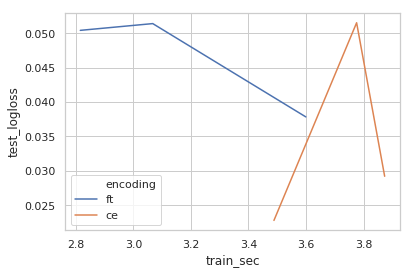

In [33]:
# x = 
g = sns.lineplot(data=df, x='train_sec', y='test_logloss', hue='encoding')

#handles, labels = g.get_legend_handles_labels()
#g.legend(handles[1:], labels[1:], loc='center left', bbox_to_anchor=(1.05, 0.5))
g.legend()
#plt.savefig('out/frontier.pdf',  bbox_inches='tight')

plt.show()